# Netflix Movies and TV Shows

On this notebook you will see an analysis with Python using Pandas and Matplotlib of the dataset Netflix Movies and TV Shows on Netflix collected by Flixable.

### Project Planning
* Import the libraries and Dataset
* Explore the dataset
* Visualizations 

#### Importing the libraries and Dataset

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('netflix_titles.csv')

#### Exploring the dataset

In [3]:
#Overview of the data set
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [4]:
#unique Values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [5]:
#Asigning the ID as the index
df.set_index('show_id', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


#### Visualizations

In [7]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Text(0.5, 1.0, 'TV show vs Movies')

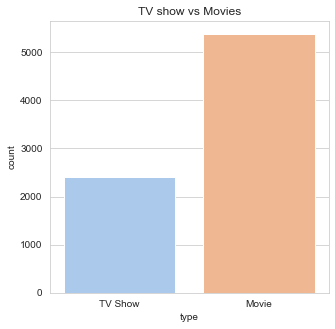

In [8]:
#Number of movies vs number of tv shows 
plt.figure(figsize=(5,5))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('TV show vs Movies')

Text(0.5, 1.0, '# of movies vs tv shows of the last 6 years')

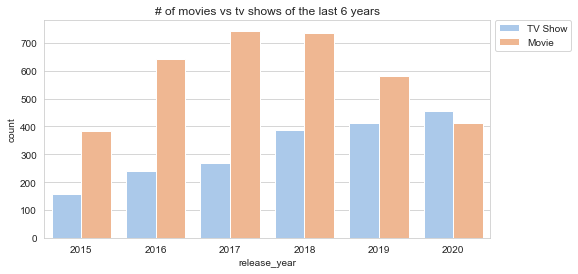

In [9]:
#Number of movies vs number of tv shows released on the last 6 years
six_years = df[(df['release_year'] >= 2015) & (df['release_year'] < 2021)]

plt.figure(figsize=(8,4))
sns.countplot(x='release_year', hue='type', data=six_years, palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('# of movies vs tv shows of the last 6 years')

Text(0.5, 1.0, 'Directros with more additions')

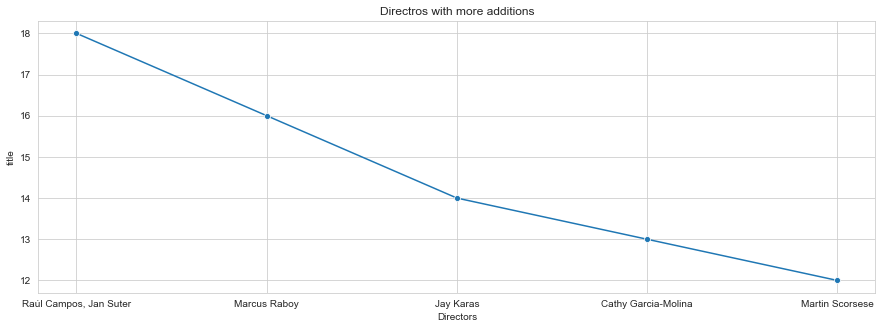

In [10]:
#Show the top 5 directors with most movies
g_director = df.groupby(by='director').count().sort_values(by='title', ascending=False).reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=g_director.head(5), x='director', y='title',marker='o')
plt.xlabel('Directors')
plt.title('Directros with more additions')

Text(0.5, 1.0, '# of movies vs tv shows by ranking')

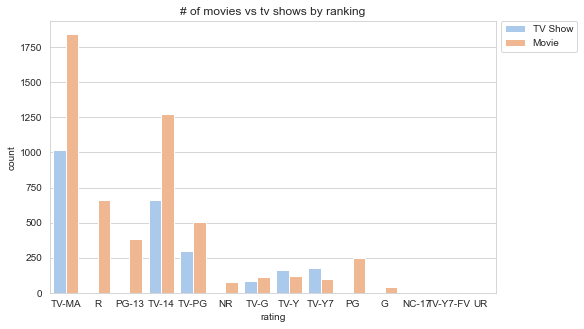

In [11]:
#number of ratings per type
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, hue='type', palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('# of movies vs tv shows by ranking')

Text(0.5, 1.0, 'Top 5 countries with more contributions')

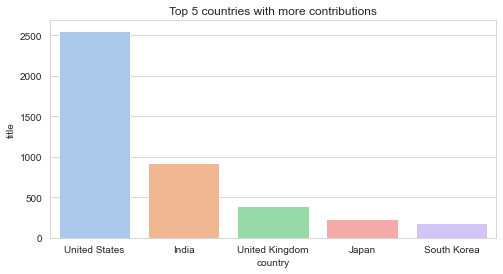

In [12]:
#Top 5 Countries with more contributions
country_group = df.groupby(by='country').count().sort_values(by='title', ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='country', y='title', data=country_group.head(), palette='pastel')
plt.title('Top 5 countries with more contributions')

Text(0.5, 1.0, 'Top 5 categories in Mexico')

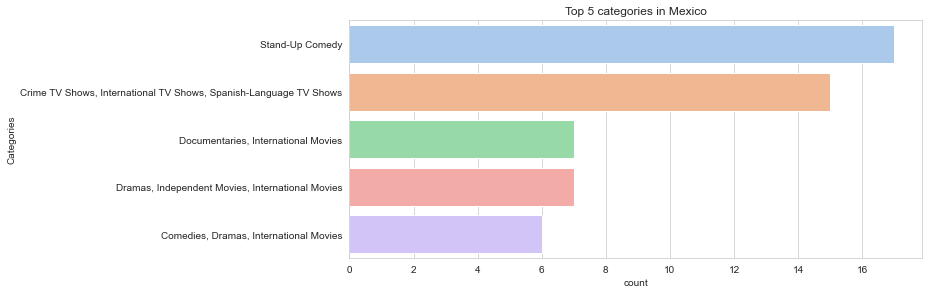

In [13]:
#Top 5 categories in Mexican additions to Netflix
mexico_categories = df[df['country'] == 'Mexico']

plt.figure(figsize=(13,4))
sns.countplot(y='listed_in', data=mexico_categories, palette='pastel', 
              order=mexico_categories['listed_in'].value_counts().iloc[:5].index, orient='v')
plt.tight_layout()
plt.ylabel('Categories')
plt.title('Top 5 categories in Mexico')